# DataBase - Electric Production 

link:> https://www.kaggle.com/datasets/shenba/time-series-datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('data\Electric_Production.csv', index_col='DATE', parse_dates=True)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [4]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [5]:
df.shape

(397, 1)

In [6]:
df.isnull()

,IPG2211A2N
DATE,
1985-01-01,False
1985-02-01,False
1985-03-01,False
1985-04-01,False
1985-05-01,False
...,...
2017-09-01,False
2017-10-01,False
2017-11-01,False


In [7]:
df.isnull().sum()

IPG2211A2N    0
dtype: int64

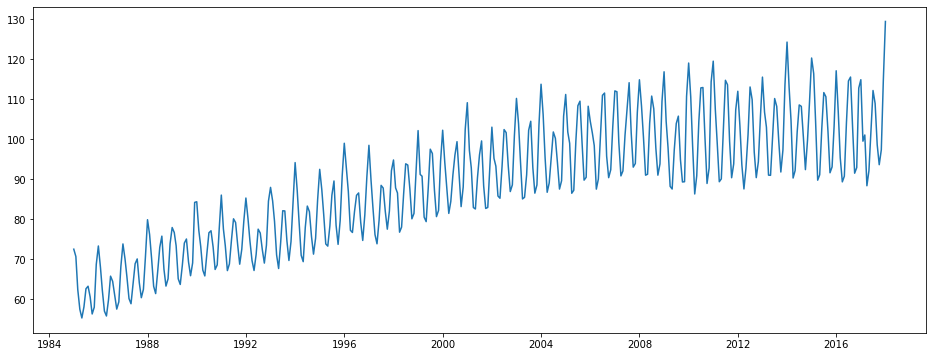

In [8]:
plt.figure(figsize=(16,6))
plt.plot(df)


In [9]:
df.columns = ['consumo']
df.head()

,consumo
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [10]:
# Consultar o início e final do data frame
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

# Usando ARIMA

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 720x432 with 0 Axes>

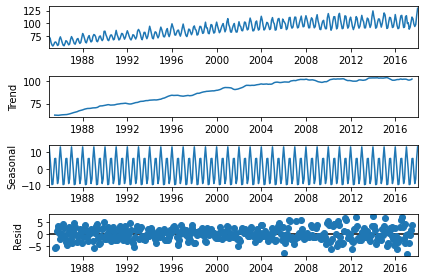

In [12]:
# Criando plot de Tendencia, Sazonalidade e residuos

result1 = seasonal_decompose(df)
fig = plt.figure(figsize=(10,6))
fig = result1.plot()

In [13]:
# Teste de estacionalidade. Se der acima de 0,05 quer dizer que não é estacionaria

# diff() calcula a diferença de um elemento DataFrame
#Comparado com outro elemento no DataFrame (o padrão é o elemento na linha anterior).

# Função de Autocorrelação (ACF)

from statsmodels.tsa.stattools import adfuller
result2 = adfuller(df['consumo'].diff().dropna())
print(f'Teste ADF: {result2[0]}')
print(f'p-valor: {result2[1]}')

Teste ADF: -7.104890882267312
p-valor: 4.0777865655394095e-10


In [14]:
# treinar o ARIMA para escolher o melhor modelo

fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
seasonal=True,
m=6, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2,
information_criterion='aic',
trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1912.925, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2404.500, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1998.731, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2057.803, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2000.250, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1880.044, Time=0.32 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=inf, Time=0.75 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=1925.181, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=1942.791, Time=0.18 sec
 ARIMA(2,1,1)(2,1,1)[6]             : AIC=1881.313, Time=0.51 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1880.682, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=1955.485, T

c:\Users\junio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


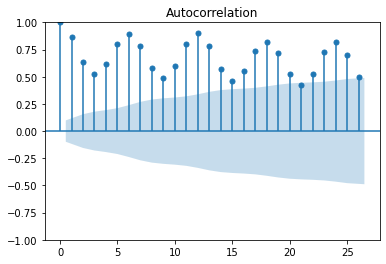

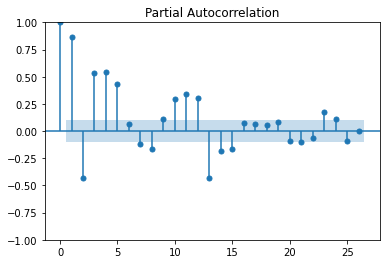

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df)
plot_pacf(df)
plt.show()

Esse gráfico, chamado de gráfico de pirulito (do inglês lollipop chart) nos mostra a quantidade de termos que precisaremos informar. Existem diferentes formas de interpretá-lo, onde uma das mais utilizadas é a seguinte:

https://medium.com/techbloghotmart/dicas-para-criar-um-modelo-de-previs%C3%A3o-de-s%C3%A9ries-temporais-d4bb2e32e148

Melhor modelo do arima para esse caso é o PDQ
- Quantidade de termos em p:

Ambos os gráficos terão o primeiro pirulito com valor 1. Para saber o quanto de termos AR irá precisar, olhe para o gráfico de ACF (parte superior da imagem acima) e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de PACF (parte inferior da imagem acima) e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa. No caso da nossa imagem acima, nosso p teria oito termos.

- Quantidade de termos em q

Um processo muito semelhante é feito para saber a quantidade de termos q. Olhe para o gráfico de PACF (parte superior da imagem acima) e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de ACF (parte inferior da imagem acima) e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa. No caso da nossa imagem acima, nosso q teria cinco termos.

Best model:  ARIMA(2,1,2)(1,1,2)[6]      -   Total fit time: 18.106 seconds

- ARIMA(2,1,2)(1,1,2)[6]    : AIC=1814.177


- Cada letra de p, d e q representam uma parte da sigla ARIMA. Como pode ver abaixo, o “p” está para o “AR” do nome do modelo, enquanto “d” está para “I” e, por fim, “q” está para “MA”.
- Quando você está construindo o modelo, você irá passar esses parâmetros na forma de uma tupla, sendo que p, d e q são números inteiros. Alguns exemplos de parâmetros que você passa na hora de criar seu modelo são: (1, 1, 1), (2,0,1), (0,0,1), e etc.
- Uma curiosidade rápida
Lembra que falei que cada letra representa uma parte do ARIMA? Se você passa esses três parâmetros sem incluir um deles (ao colocar o número 0), você tem um tipo de modelo diferente. Por exemplo, se você passa os parâmetros (0, 0, 1), você não terá mais um modelo ARIMA, e sim um modelo MA; se você utiliza (1,0,0), você terá um modelo AR; se usar (1,0,1), você criou um modelo ARMA. Bem legal, né?


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [18]:
# treinando o modelo do SARIMAX com os valores (2,1,2)(1,1,2)[6], obtidos com o uso do auto_arima.
model = SARIMAX(df, order=(2,1,2), seasonal_order=(1,1,2,6))
result_sarimax = model.fit()

c:\Users\junio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\junio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\junio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           consumo   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -899.089
Date:                           Sun, 22 May 2022   AIC                           1814.177
Time:                                   14:39:33   BIC                           1845.907
Sample:                               01-01-1985   HQIC                          1826.755
                                    - 01-01-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.350     -0.249      0.803      -0.773       0.599
ar.L2          0.2828      0.214      1.321      0.187      -0.137       0.702
ma.L1         -0.2982      0.337     -0.884      0.377      -0.960       0.363
ma.L2         -0.6397      0.329     -1.944      0.052      -1.285       0.005
ar.S.L6       -0.9976      0.003   -380.139      0.000      -1.003      -0.992
ma.S.L6        0.1145      0.040      2.832      0.005       0.035       0.194
ma.S.L12      -0.7764      0.037    -20.853      0.000      -0.849      -0.703
sigma2         5.5549      0.307     18.092      0.000       4.953       6.157
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                42.26
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Criar predições com base no modelo criado
# Predições para 12 dias anteriores

ant_predict = result_sarimax.get_prediction(start=-12)
predict_mean = ant_predict.predicted_mean

In [21]:
predict_mean

2017-02-01    107.675205
2017-03-01     95.540000
2017-04-01     90.778729
2017-05-01     90.182050
2017-06-01    103.563323
2017-07-01    111.200804
2017-08-01    110.914729
2017-09-01     99.347155
2017-10-01     90.451113
2017-11-01     96.084702
2017-12-01    110.968007
2018-01-01    120.963725
Freq: MS, Name: predicted_mean, dtype: float64

In [23]:
# Intervalo de confiança

interval_confi = ant_predict.conf_int()
limit_up = interval_confi.iloc[:,0]
limit_down = interval_confi.iloc[:,1]

print(limit_up[0], limit_down[0])
print(predict_mean[0])

103.05569239517732 112.29471700529481
107.67520470023607


In [24]:
# Pegando as datas previstas e totais
date_predict = np.asanyarray(predict_mean.index)
date_all = np.asanyarray(df.index)

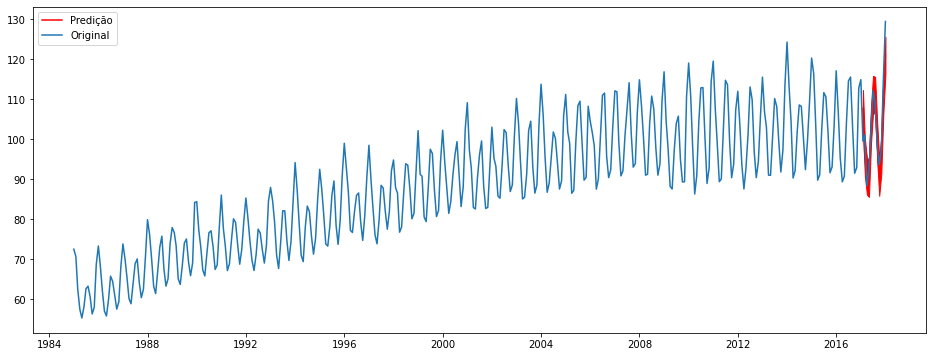

In [25]:
# Criar gráfico com as predições de 12 dias para tras
plt.figure(figsize=(16,6))
plt.plot(date_predict,predict_mean.values, color='r', label= 'Predição')
plt.fill_between(date_predict, limit_down, limit_up, color='r')
plt.plot(date_all, df.values, label='Original')
plt.legend()
plt.show()

In [26]:
# Calcular erro médio quadratico
from sklearn.metrics import mean_squared_error
from math import sqrt

emq_sarimax = sqrt(mean_squared_error(df[-12:].values, predict_mean.values))
print(emq_sarimax)

4.1932682396084475


# Forecast com ARIMA

In [28]:
# Criar predições com base no modelo criado
# Predições para 12 

forescast = result_sarimax.get_forecast(steps=12)
forescast_mean = forescast.predicted_mean
forescast_mean.size

12

In [29]:
# Pegando intervalo de confiança
forescast_confi = forescast.conf_int()
forescast_down = forescast_confi.iloc[:,0]
forescast_up = forescast_confi.iloc[:,1]

print(forescast_down[0], forescast_up[0])
print(forescast_mean[0])

109.93678595793051 119.17577249899776
114.55627922846413


In [30]:
# Pegar as datas de predição(Forecast)

date_forecast = np.asarray(forescast_mean.index)


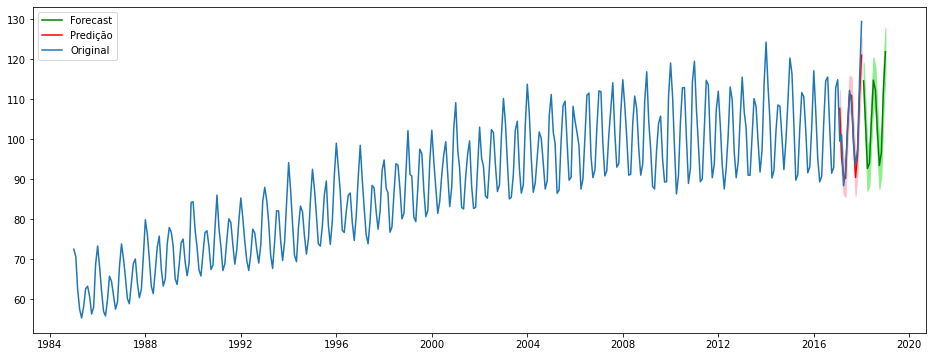

In [32]:
# Criar Gráfico com os dados de Forecast

plt.figure(figsize=(16,6))
plt.plot(date_forecast, forescast_mean.values, color='g', label='Forecast')
plt.fill_between(date_forecast,forescast_down, forescast_up, color='lightgreen')

plt.plot(date_predict, predict_mean.values, color='r', label='Predição')
plt.fill_between(date_predict,limit_down, limit_up, color='pink')

plt.plot(date_all, df.values,label='Original')
plt.legend(loc='upper left')
plt.show()

# Prevendo com ML XGBoost

In [33]:
df

,consumo
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [34]:
# Distribuindo valores da base de dados para Treino e teste de validação
treino = df.loc[df.index <= '2016-12-31']
validacao = df.loc[df.index > '2016-12-31']

treino.shape, validacao.shape

((384, 1), (13, 1))

In [35]:
treino.head()

,consumo
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [36]:
validacao.head()

,consumo
DATE,
2017-01-01,114.8505
2017-02-01,99.4901
2017-03-01,101.0396
2017-04-01,88.3530
2017-05-01,92.0805


In [37]:
treino['targ'] = treino['consumo'].shift(-1)
validacao['targ'] = validacao['consumo'].shift(-1)

C:\Users\junio\AppData\Local\Temp\ipykernel_13028\380481654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['targ'] = treino['consumo'].shift(-1)
C:\Users\junio\AppData\Local\Temp\ipykernel_13028\380481654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['targ'] = validacao['consumo'].shift(-1)


In [38]:
treino.tail()

,consumo,targ
DATE,,
2016-08-01,115.5159,102.7637
2016-09-01,102.7637,91.4867
2016-10-01,91.4867,92.8900
2016-11-01,92.8900,112.7694
2016-12-01,112.7694,NaN


In [39]:
validacao.tail()

,consumo,targ
DATE,,
2017-09-01,98.6154,93.6137
2017-10-01,93.6137,97.3359
2017-11-01,97.3359,114.7212
2017-12-01,114.7212,129.4048
2018-01-01,129.4048,NaN


In [41]:
treino.dropna(axis=0, inplace=True)
validacao.dropna(axis=0, inplace=True)

C:\Users\junio\AppData\Local\Temp\ipykernel_13028\641921268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino.dropna(axis=0, inplace=True)
C:\Users\junio\AppData\Local\Temp\ipykernel_13028\641921268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao.dropna(axis=0, inplace=True)


In [42]:
treino.tail()

,consumo,targ
DATE,,
2016-07-01,114.5397,115.5159
2016-08-01,115.5159,102.7637
2016-09-01,102.7637,91.4867
2016-10-01,91.4867,92.8900
2016-11-01,92.8900,112.7694


In [43]:
validacao.tail()

,consumo,targ
DATE,,
2017-08-01,108.9312,98.6154
2017-09-01,98.6154,93.6137
2017-10-01,93.6137,97.3359
2017-11-01,97.3359,114.7212
2017-12-01,114.7212,129.4048


In [45]:
# separa x e y de treino e teste

X_train = treino.loc[:, ['consumo']].values
Y_train = treino.loc[:, ['targ']].values
X_test = validacao.loc[:,['consumo']].values
Y_test = validacao.loc[:,['targ']].values

# Comprimento dos dados:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape 

((383, 1), (383, 1), (12, 1), (12, 1))

In [46]:
# Treinamento do modelo XGBoost

model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model_xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [56]:
validacao.iloc[9]

consumo    93.6137
targ       97.3359
Name: 2017-10-01 00:00:00, dtype: float64

In [55]:
predict_xgb = model_xgb.predict(X_test[9])
predict_xgb

array([87.55729], dtype=float32)